In [1]:
# libararies to be used
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
data.apply(lambda x: len(x.unique()))

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
##Eda

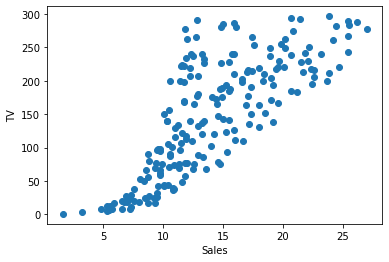

In [7]:
plt.scatter(data["sales"], data['TV'])
plt.xlabel("Sales")
plt.ylabel("TV")
plt.show()

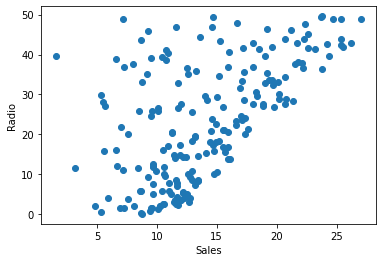

In [8]:
plt.scatter(data["sales"], data['radio'])
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.show()

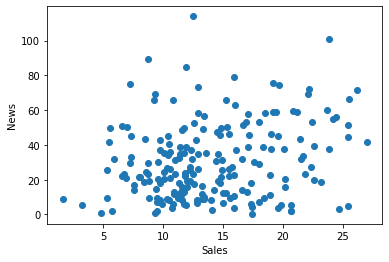

In [9]:
plt.scatter(data["sales"], data['newspaper'])
plt.xlabel("Sales")
plt.ylabel("News")
plt.show()

In [12]:
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data.drop('sales',axis=1)
y=data['sales']
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
l=[0.2,0.25,0.3]
for i in range(200):
    for j in l:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=j,
                                                        random_state=i)
        SC=StandardScaler()
        x_train = SC.fit_transform(x_train)
        x_test = SC.fit_transform(x_test)
        model=LinearRegression()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)

        if acc>maxAcc:
            maxAcc=acc
            maxRS=i
            print("R-square",maxAcc,'Random state',i,"Size",j)

R-square 0.8246402101734609 Random state 0 Size 0.2
R-square 0.8774015580211038 Random state 1 Size 0.25
R-square 0.8997132869382614 Random state 1 Size 0.3
R-square 0.9092369970255348 Random state 3 Size 0.2
R-square 0.9221422888083269 Random state 6 Size 0.2
R-square 0.9339568579758697 Random state 13 Size 0.3
R-square 0.9369490251303776 Random state 33 Size 0.3
R-square 0.951484409477648 Random state 57 Size 0.2
R-square 0.9570006806212352 Random state 151 Size 0.2


In [14]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state =151)
linearRegressor = LinearRegression() 

In [15]:
linearRegressor.fit(x_train, y_train)
linearRegressor.intercept_

2.8102813925931827

In [16]:
yPrediction = linearRegressor.predict(x_test)
yPrediction

array([ 7.27680194, 12.05612052, 12.51746696,  9.77520881, 10.73610552,
       19.85519734, 22.83523806,  4.32212067,  8.9455786 ,  3.60449061,
       12.04952342, 14.70881008,  6.29105602, 15.27626738, 18.16667733,
       10.40460407, 19.19918477,  9.66899045, 17.04939085, 17.28147699,
       12.45124657, 24.08300287, 16.92522133, 23.16745652, 18.26083969,
        8.02916795, 17.83079285,  3.41452707, 17.22200368,  8.72558597,
       12.74164394, 14.54871681,  9.84817906, 12.58536798, 18.97628445,
       19.38685331,  4.2930151 , 20.37576645, 19.97342667, 16.82354949])

In [17]:
from sklearn.metrics import max_error
max_error(y_test,yPrediction)

2.736105517833101

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,yPrediction)

0.9650131060159659

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yPrediction)

1.4613559347419973

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,yPrediction)

0.9526488497301869

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
l=[0.2,0.25,0.3]
for i in range(200):
    for j in l:
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=j,
                                                    random_state=i)
        ridge = Ridge()
        ridge.fit(x_train,y_train)
        pred= ridge.predict(x_test)
        acc=r2_score(y_test,pred)
    
        if acc>maxAcc:
            maxAcc=acc
            maxRS=i
            print("R-square",maxAcc,'Random state',i,'test size',j)

R-square 0.8564831550191528 Random state 0 test size 0.2
R-square 0.8621284843128437 Random state 0 test size 0.3
R-square 0.892872305920994 Random state 1 test size 0.2
R-square 0.9157085278965105 Random state 1 test size 0.25
R-square 0.9225153486429136 Random state 1 test size 0.3
R-square 0.9254791402290821 Random state 9 test size 0.2
R-square 0.9305859975316492 Random state 13 test size 0.2
R-square 0.9326673522978403 Random state 13 test size 0.25
R-square 0.9332792654862525 Random state 13 test size 0.3
R-square 0.9408105759296913 Random state 57 test size 0.2
R-square 0.9509824829166718 Random state 92 test size 0.2
R-square 0.9526497047453708 Random state 151 test size 0.2


In [24]:
# Ridge Regression
ridge = Ridge()

parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)


x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.2, random_state = 151)

ridge_regression.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 10}
-3.298357669424237


In [26]:
# prediction
ridge_pred = ridge_regression.predict(x_test)
ridge_pred = pd.DataFrame(ridge_pred, columns=['Predictions'])

In [27]:
from sklearn.metrics import max_error
max_error(y_test,ridge_pred )

2.7350565688677655

In [28]:
r2_score(y_test,ridge_pred)

0.9526573746866124

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ridge_pred )

0.9650459257278197

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ridge_pred)

1.461092836684299

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso = Lasso()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x_train, y_train)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-3.274170164693591


In [33]:
lasso_pred = lasso_regression.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,lasso_pred)

1.4283657808243895

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,lasso_pred)

0.9537178033632063

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
parameters = {'bootstrap': [True],
 'max_depth': [5,7,9],
 'max_features': ['auto'],
 'n_estimators': [800,1000,1200]}
regr = RandomForestRegressor()

clf = GridSearchCV(regr, parameters, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 7, 9],
                         'max_features': ['auto'],
                         'n_estimators': [800, 1000, 1200]})

In [37]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 1000}
0.9713684553172486


In [38]:
y_pred_train = clf.predict(x_test)
r2_score(y_test,y_pred_train)

0.9732904647610293

In [39]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squaredlogerror',],
              'learning_rate': [0.1,0.01,], #so called `eta` value
              'max_depth': [3,5,7,9],
              'n_estimators': [400,500,600,700]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(x_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[17:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [40]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9798738459624593
{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 700, 'objective': 'reg:linear'}


In [41]:
Xg_pred = xgb_grid.predict(x_test)
r2_score(y_test,Xg_pred)

0.9736112149774535

In [42]:
%%time
import pickle
# # saved the trained model in file with given name
pickle_out = open("advertising_random_forest.pickle","wb") # name of my pickle file , wb -write
pickle.dump(clf, pickle_out)
pickle_out.close()

Wall time: 140 ms


In [44]:
# loading the pickeled model
pickle_in = open("advertising_random_forest.pickle","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
trained_model.predict(x_test)

array([ 9.0283605 , 12.89499061, 11.66266635, 10.34886662,  7.68782524,
       21.51245574, 24.67775542,  7.82836667,  8.40471833,  6.44867   ,
       12.6161975 , 15.16614379,  7.51691056, 14.06776198, 19.02655429,
       12.22833768, 19.50635262, 10.23293559, 18.03742354, 16.91729427,
       10.59377167, 24.84839661, 16.200965  , 23.52401327, 19.75119898,
        9.67141663, 16.92245667,  6.77329222, 18.17669901,  9.94489784,
       12.96873571, 12.24834134, 10.95490667, 11.69921857, 19.8353522 ,
       19.5815022 ,  6.92895476, 20.29320553, 20.3951091 , 15.16819921])

In [45]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("advertising_xgboost.pickle","wb") # name of my pickle file , wb -write
pickle.dump(clf, pickle_out)
pickle_out.close()

In [46]:
# loading the pickeled model
pickle_in = open("advertising_xgboost.pickle","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
trained_model.predict(x_test)

array([ 9.0283605 , 12.89499061, 11.66266635, 10.34886662,  7.68782524,
       21.51245574, 24.67775542,  7.82836667,  8.40471833,  6.44867   ,
       12.6161975 , 15.16614379,  7.51691056, 14.06776198, 19.02655429,
       12.22833768, 19.50635262, 10.23293559, 18.03742354, 16.91729427,
       10.59377167, 24.84839661, 16.200965  , 23.52401327, 19.75119898,
        9.67141663, 16.92245667,  6.77329222, 18.17669901,  9.94489784,
       12.96873571, 12.24834134, 10.95490667, 11.69921857, 19.8353522 ,
       19.5815022 ,  6.92895476, 20.29320553, 20.3951091 , 15.16819921])